# 미니 프로젝트 : 가위바위보 분류기를 만들자

### 1. 데이터를 준비하자
#### 1.1 데이터 만들기

#### 1.2 디렉토리 만들기

#### 1.3 데이터 불러오기 + Resize 하기

In [261]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [262]:
target_size = (28, 28) # 변환 할 이미지 사이즈를 지정

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
        
    count = 0
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save((img_path + '/train/' + str(count) + ".jpg"), "JPEG")
        count += 1
        
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리의 모든 jpg 파일을 불러옴
image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path_scissor)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [263]:
# 가위 이미지와 마찬가지로 바위 및 보 이미지도 resize 해줌
image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path_rock)

image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path_paper)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [264]:
# 팀원 자료를 리사이즈 해주는 함수
def resize_images_add(img_path):
    
    # 각 폴더 내에 add폴더를 만들어서 팀원의 이미지를 저장했음
    images = glob.glob(img_path + "/add/*.jpg")

    print(len(images), " images to be resized.")
    
    count = 100 # 100.jpg부터 저장하기 위해 count를 100으로 지정
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img_path + "/train/" + str(count) + '.jpg', "JPEG") # 새로운 이미지 path
        count += 1
        
        
    print(len(images), " images resized.")
    
image_dir_path_paper_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images_add(image_dir_path_paper_)
image_dir_path_rock_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images_add(image_dir_path_rock_)
image_dir_path_scissor_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images_add(image_dir_path_scissor_)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [265]:
import numpy as np

def load_data(img_path, number_of_data=600):
    # 가위: 0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    
    # 이미지 데이터와 레이블 데이터를 담을 행렬을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    modes = ['scissor', 'rock', 'paper']
    for i, mode in enumerate(modes):
        for file in glob.iglob(img_path + "/" + mode + '/train/' + "/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = i
            idx += 1

    print("학습 데이터(x_train)의 개수는 {}개 입니다".format(idx))
    return imgs, labels


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # x_train 값의 범위를 0~1로 정규화
#x_train_norm = (x_train - 127) / 127.0  # x_train 값의 범위를 0~1로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습 데이터(x_train)의 개수는 600개 입니다
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


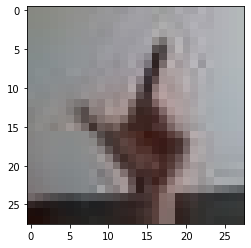

In [266]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 딥러닝 네트워크 설계하기

In [277]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_98 (Dense)             (None, 3)               

### 3. 딥러닝 네트워크 학습하기

In [278]:
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
19/19 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.3433
Epoch 2/20
19/19 [==============================] - 0s 3ms/step - loss: 1.0227 - accuracy: 0.5817
Epoch 3/20
19/19 [==============================] - 0s 3ms/step - loss: 0.9050 - accuracy: 0.7150
Epoch 4/20
19/19 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.8850
Epoch 5/20
19/19 [==============================] - 0s 3ms/step - loss: 0.5071 - accuracy: 0.9067
Epoch 6/20
19/19 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.9250
Epoch 7/20
19/19 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9533
Epoch 8/20
19/19 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9767
Epoch 9/20
19/19 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9683
Epoch 10/20
19/19 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9867
Epoch 11/20
19/19 [

### 4. 얼마나 잘 만들었는지 확인하기(테스트)

In [269]:
def resize_images_test(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    count = 0
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save((img_path + '/' + str(count) + ".jpg"), "JPEG")
        count += 1
        
    print(len(images), " images resized.")

image_dir_path_scissor = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images_test(image_dir_path_scissor)

image_dir_path_paper = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images_test(image_dir_path_paper)

image_dir_path_rock = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images_test(image_dir_path_rock)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [270]:
def load_data_test(img_path, number_of_data=600):
    # 가위: 0, 바위: 1, 보: 2
    img_size = 28
    color = 3
    
    # 이미지 데이터와 레이블 데이터를 담을 행렬을 생성
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    
    modes = ['scissor', 'rock', 'paper']
    for i, mode in enumerate(modes):
        print('레이블: {}, mode: {}'.format(i, mode))
        for file in glob.iglob(img_path + "/" + mode + "/*.jpg"):
            img = np.array(Image.open(file), dtype=np.int32)
            imgs[idx,:,:,:] = img
            labels[idx] = i
            idx += 1

    print("학습 데이터(x_train)의 개수는 {}개 입니다".format(idx))
    return imgs, labels


test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_data_test(test_image_dir_path)

x_test_norm = x_test / 255.0
#x_test_norm = (x_test - 127) / 127.0

x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

레이블: 0, mode: scissor
레이블: 1, mode: rock
레이블: 2, mode: paper
학습 데이터(x_train)의 개수는 300개 입니다


In [279]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 1.6832 - accuracy: 0.6400
test_loss: 1.6832431554794312 
test_accuracy: 0.6399999856948853


model.predict() 결과 :  [9.9934286e-01 6.5650541e-04 6.5075682e-07]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  1


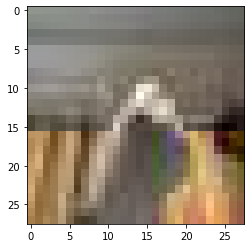

In [272]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=130  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

잘못 예측한 경우는 총 267개 입니다.
예측확률분포: [0.14327975 0.8396615  0.01705874]
라벨: 0, 예측결과: 1


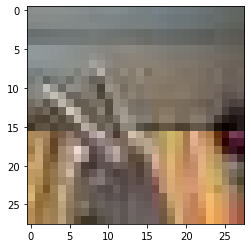

예측확률분포: [0.37861213 0.39002556 0.23136233]
라벨: 2, 예측결과: 1


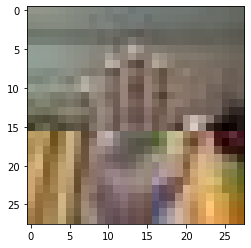

예측확률분포: [4.6251214e-01 5.3744501e-01 4.2848358e-05]
라벨: 2, 예측결과: 1


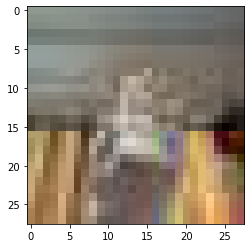

예측확률분포: [0.40460816 0.46766275 0.12772907]
라벨: 2, 예측결과: 1


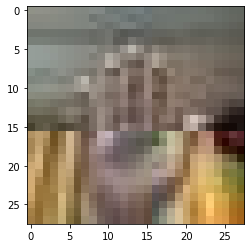

예측확률분포: [1.0280248e-01 8.9719433e-01 3.1775337e-06]
라벨: 0, 예측결과: 1


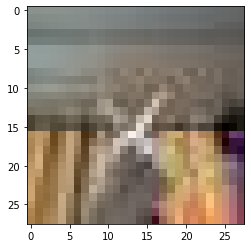

In [273]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

print('잘못 예측한 경우는 총 {}개 입니다.'.format(len(wrong_predict_list)))
# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 5. 더 좋은 네트워크 만들어보기

### 6. 회고